# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [10]:
# TODO: Group by site
site_summary = df.groupby('site')[['age', 'bmi', 'systolic_bp', 'diastolic_bp']].mean()


In [11]:
# TODO: Count by intervention group
group_counts = df.groupby('intervention_group')['patient_id'].count()

**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [12]:
# TODO: Use summarize_by_group utility
agg_dict = {                    ##specify costom aggregation 
    'age': ['mean', 'std'],
    'bmi': ['mean', 'std']
}

summary_stats = summarize_by_group(df, 'site', agg_dict)

## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [13]:
# TODO: Multiple aggregations
age = df.groupby('site')['age'].agg(['mean', 'median', 'std'])
bmi = df.groupby('site')['bmi'].agg(['mean', 'std'])
systolic_bp = df.groupby('site')['systolic_bp'].agg(['mean', 'median'])
summary_stats_multi = pd.concat([age, bmi, systolic_bp], axis=1)
print(summary_stats_multi)

                  mean  median         std       mean       std        mean  \
site                                                                          
  SITE A     23.608108    81.0  246.535880  25.872059  4.805123  116.633803   
  SITE B     59.670213    81.0  157.423433  26.822826  3.562445  118.055556   
  SITE C     60.254545    78.0  146.070787  25.688889  6.682268  115.942308   
  SITE D     77.853659    78.0   11.501219  25.892105  8.003154  119.513514   
  SITE E     12.258065    81.0  270.211641  25.496667  3.439275  113.066667   
  Site  A    80.328358    77.0   14.431015  25.452239  5.813447  118.552239   
  Site A     49.843750    83.0  190.210011  26.263934  4.044504  119.682540   
  Site B     56.318182    80.5  162.423495  26.521429  3.800034  117.035294   
  Site C     27.831325    79.0  232.797453  26.454054  3.563521  116.419753   
  Site D    -25.312500    73.5  318.343742  26.387097  3.759321  117.406250   
  Site E     75.500000    74.0   13.800406  27.10285

## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [16]:
# TODO: Intervention group comparisons
for col in ['outcome_cvd', 'dropout']:
    df[col] = df[col].astype(str).str.lower().str.strip()
    df[col] = df[col].replace({
        'yes': 1, 'y': 1,
        'no': 0, 'n': 0
    }).astype(float)
cvd_rate = df.groupby('intervention_group', as_index=False)['outcome_cvd'].mean()
cvd_rate.columns = ['intervention_group', 'mean_cvd_rate']
adherence_mean = df.groupby('intervention_group', as_index=False)['adherence_pct'].mean()
adherence_mean.columns = ['intervention_group', 'mean_adherence_pct']
dropout_crosstab = pd.crosstab(df['intervention_group'], df['dropout'])
print("Cross-tabulation of intervention group vs dropout status:\n", dropout_crosstab, "\n")

Cross-tabulation of intervention group vs dropout status:
 dropout             0.0  1.0
intervention_group          
  CONTROL            68   16
  Contrl             57   16
  Control            83   12
  TREATMENT A        54   11
  TREATMENT B        76    7
  Treatmen A         53    7
  Treatment  B       54   10
  Treatment A        53   13
  Treatment B        86   18
  TreatmentA         53   13
  control            68   15
  treatment a        53   14
  treatment b        74   16
CONTROL             605  110
Contrl              685  117
Control             640  111
TREATMENT A         486   86
TREATMENT B         671   90
Treatmen A          507   85
Treatment  B        659  101
Treatment A         529   81
Treatment B         620  110
TreatmentA          541   94
control             625  109
treatment a         502   86
treatment b         631  119 



/var/folders/49/w0jyt4j1499dvzs2fxpfr6r00000gn/T/ipykernel_2336/3836638009.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({
/var/folders/49/w0jyt4j1499dvzs2fxpfr6r00000gn/T/ipykernel_2336/3836638009.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({


<Figure size 1000x600 with 0 Axes>

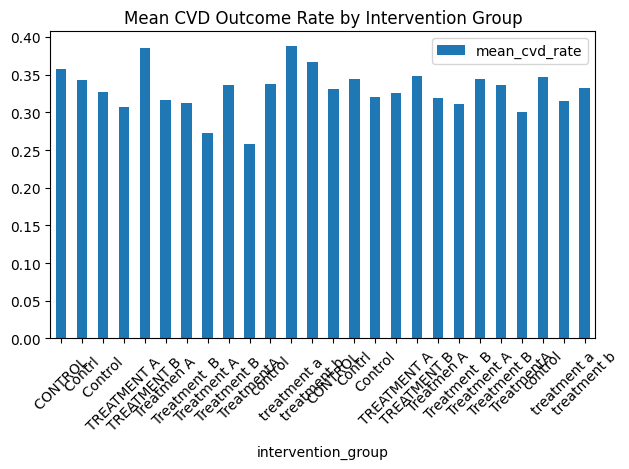

<Figure size 1000x600 with 0 Axes>

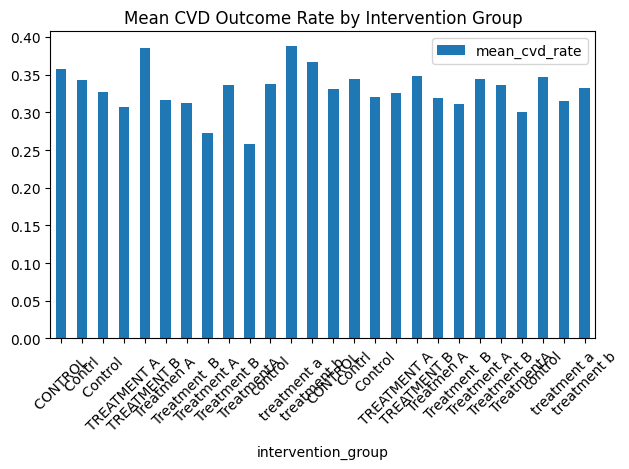

In [18]:
# TODO: Visualization
plot_group_comparison(
    data=cvd_rate,
    x_col='intervention_group',
    y_col='mean_cvd_rate',
    title='Mean CVD Outcome Rate by Intervention Group'
)

plot_group_comparison(
    data=cvd_rate,
    x_col='intervention_group',
    y_col='mean_cvd_rate',
    title='Mean CVD Outcome Rate by Intervention Group'
)

## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [19]:
# TODO: Save summary outputs
site_summary = df.groupby('site')[['age', 'bmi', 'systolic_bp', 'diastolic_bp']].agg(['mean', 'std', 'min', 'max'])
site_summary.to_csv('output/q7_site_summary.csv')

intervention_comparison = pd.DataFrame({
    'mean_cvd_rate': df.groupby('intervention_group')['outcome_cvd'].mean(),
    'mean_adherence_pct': df.groupby('intervention_group')['adherence_pct'].mean()
})
intervention_comparison.to_csv('output/q7_intervention_comparison.csv')

with open('output/q7_analysis_report.txt', 'w') as f:
    f.write("Q7 Key Findings:\n")
    f.write("\nMean CVD Rate by Intervention Group:\n")
    f.write(intervention_comparison['mean_cvd_rate'].to_string())
    f.write("\n\nMean Adherence % by Intervention Group:\n")
    f.write(intervention_comparison['mean_adherence_pct'].to_string())

print("Saved Q7 files to output/")

Saved Q7 files to output/


## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. TODO
2. TODO
3. TODO
